In [18]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [19]:
# Ruta del dataset imputado
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"


In [20]:
# Cargar el dataset
df = pd.read_csv(ruta_dataset)


In [21]:
# Generar tasas de crecimiento de accesos por municipio y departamento
df.sort_values(by=["DEPARTAMENTO", "MUNICIPIO", "AÑO"], inplace=True)
df["Tasa_Crecimiento"] = df.groupby(["DEPARTAMENTO", "MUNICIPIO"])["No. ACCESOS FIJOS A INTERNET"].pct_change()
df["Tasa_Crecimiento"].fillna(0, inplace=True)  # Reemplazar NaN inicial por 0


/tmp/ipykernel_4949/4050888708.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Tasa_Crecimiento"].fillna(0, inplace=True)  # Reemplazar NaN inicial por 0


In [22]:
# Generar densidad de accesos por área geográfica
df["Densidad_Accesos"] = df["No. ACCESOS FIJOS A INTERNET"] / (df["Latitud"].abs() + df["Longitud"].abs())
df["Densidad_Accesos"].replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazar valores infinitos
df["Densidad_Accesos"].fillna(0, inplace=True)  # Reemplazar NaN con 0


/tmp/ipykernel_4949/3541618908.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Densidad_Accesos"].replace([np.inf, -np.inf], np.nan, inplace=True)  # Reemplazar valores infinitos
/tmp/ipykernel_4949/3541618908.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [23]:
# Crear promedios móviles para accesos
df["Promedio_Movil"] = df.groupby(["DEPARTAMENTO", "MUNICIPIO"])["No. ACCESOS FIJOS A INTERNET"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())


In [24]:
# Crear índice compuesto para velocidades de bajada y subida
df["Indice_Velocidad"] = (df["VELOCIDAD BAJADA"] + df["VELOCIDAD SUBIDA"]) / 2


In [25]:
# Codificar variables categóricas (One-Hot Encoding)
df = pd.get_dummies(df, columns=["SEGMENTO", "TECNOLOGÍA"], drop_first=True)


In [26]:
# Normalizar variables continuas
columnas_a_normalizar = ["Latitud", "Longitud", "VELOCIDAD BAJADA", "VELOCIDAD SUBIDA", "Densidad_Accesos", "Indice_Velocidad"]
scaler = StandardScaler()
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])


In [27]:
# Guardar dataset con nuevas características
ruta_dataset_mejorado = "../../Limpieza/data/df_mejorado.csv"
df.to_csv(ruta_dataset_mejorado, index=False)


In [28]:
# Cargar el dataset mejorado
df_mejorado = pd.read_csv(ruta_dataset_mejorado)


In [29]:
# Revisar estructura del dataset mejorado
print("Estructura del dataset mejorado:")
print(df_mejorado.info())


Estructura del dataset mejorado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 39 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   AÑO                                                              917885 non-null  int64  
 1   TRIMESTRE                                                        917885 non-null  float64
 2   PROVEEDOR                                                        917885 non-null  object 
 3   CÓDIGO DANE                                                      917885 non-null  float64
 4   DEPARTAMENTO                                                     917885 non-null  object 
 5   CÓDIGO DANE.1                                                    917885 non-null  float64
 6   MUNICIPIO                                                        917885 non-null  object 
 

In [30]:
# Revisar las primeras filas
print("\nPrimeras filas del dataset mejorado:")
print(df_mejorado.head())



Primeras filas del dataset mejorado:
    AÑO  TRIMESTRE                              PROVEEDOR  CÓDIGO DANE  \
0  2021        3.0                     @DIGITAL GROUP SAS          5.0   
1  2021        3.0                     @DIGITAL GROUP SAS          5.0   
2  2021        3.0                     @DIGITAL GROUP SAS          5.0   
3  2021        3.0  AXESS NETWORKS SOLUTIONS COLOMBIA SAS          5.0   
4  2021        3.0  AXESS NETWORKS SOLUTIONS COLOMBIA SAS          5.0   

  DEPARTAMENTO  CÓDIGO DANE.1 MUNICIPIO  VELOCIDAD BAJADA  VELOCIDAD SUBIDA  \
0    ANTIOQUIA         5031.0    AMALFI         -0.028917         -0.022161   
1    ANTIOQUIA         5031.0    AMALFI         -0.027352         -0.022161   
2    ANTIOQUIA         5031.0    AMALFI         -0.029230         -0.022161   
3    ANTIOQUIA         5031.0    AMALFI         -0.032010         -0.022932   
4    ANTIOQUIA         5031.0    AMALFI         -0.032039         -0.022968   

   No. ACCESOS FIJOS A INTERNET  ...  TECN

In [31]:
# Verificar valores nulos
nulos_por_columna = df_mejorado.isnull().sum()
print("\nValores nulos por columna:")
print(nulos_por_columna)



Valores nulos por columna:
AÑO                                                                0
TRIMESTRE                                                          0
PROVEEDOR                                                          0
CÓDIGO DANE                                                        0
DEPARTAMENTO                                                       0
CÓDIGO DANE.1                                                      0
MUNICIPIO                                                          0
VELOCIDAD BAJADA                                                   0
VELOCIDAD SUBIDA                                                   0
No. ACCESOS FIJOS A INTERNET                                       0
Latitud                                                            0
Longitud                                                           0
Tasa_Crecimiento                                                   0
Densidad_Accesos                                                   0
Promed

In [32]:
# Descripción estadística de las nuevas características
nuevas_columnas = ["Tasa_Crecimiento", "Densidad_Accesos", "Promedio_Movil", "Indice_Velocidad"]
print("\nDescripción estadística de las nuevas características:")
print(df_mejorado[nuevas_columnas].describe())



Descripción estadística de las nuevas características:
       Tasa_Crecimiento  Densidad_Accesos  Promedio_Movil  Indice_Velocidad
count      9.178850e+05      9.178850e+05   917885.000000      9.178850e+05
mean                inf      7.420025e-17       41.685590      2.916841e-17
std                 NaN      1.000001e+00      253.429034      1.000001e+00
min       -1.000000e+00     -6.479736e-02        0.000000     -2.779863e-02
25%       -7.340426e-01     -6.328699e-02        2.666667     -2.675482e-02
50%        0.000000e+00     -6.026052e-02        8.000000     -2.298104e-02
75%        2.791139e+00     -4.394497e-02       27.333333     -9.732672e-03
max                 inf      4.432247e+02   100437.666667      4.110730e+02


/home/hadoop/data-projects/InternetAccessColombia/InternetAccessColombia-DataCleaning/venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [35]:
# Filtrar valores infinitos o NaN en la columna "Tasa_Crecimiento"
tasa_crecimiento_valida = df_mejorado["Tasa_Crecimiento"][np.isfinite(df_mejorado["Tasa_Crecimiento"])]

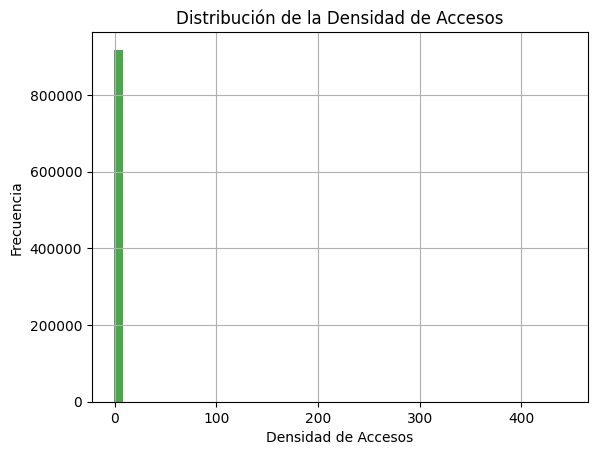

In [36]:
# Distribución de la densidad de accesos
plt.hist(df_mejorado["Densidad_Accesos"], bins=50, alpha=0.7, color='green')
plt.title("Distribución de la Densidad de Accesos")
plt.xlabel("Densidad de Accesos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


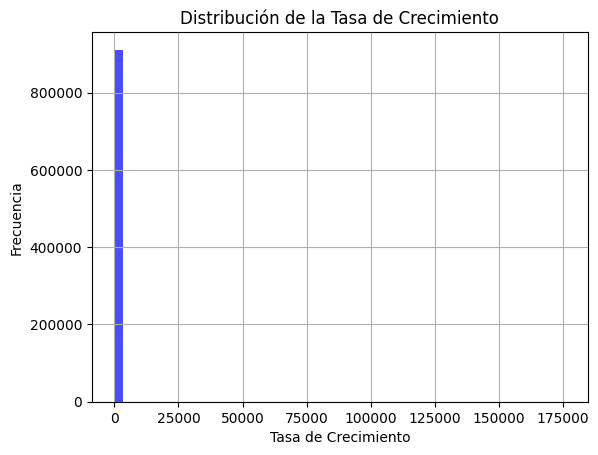

In [38]:
# Reemplazar valores infinitos y NaN en la columna "Tasa_Crecimiento"
df_mejorado["Tasa_Crecimiento"] = df_mejorado["Tasa_Crecimiento"].replace([np.inf, -np.inf], np.nan).dropna()

# Filtrar valores válidos
tasa_crecimiento_valida = df_mejorado["Tasa_Crecimiento"]

# Distribución de la tasa de crecimiento
plt.hist(tasa_crecimiento_valida, bins=50, alpha=0.7, color='blue')
plt.title("Distribución de la Tasa de Crecimiento")
plt.xlabel("Tasa de Crecimiento")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [40]:
df_mejorado

,AÑO,TRIMESTRE,PROVEEDOR,CÓDIGO DANE,DEPARTAMENTO,CÓDIGO DANE.1,MUNICIPIO,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,...,TECNOLOGÍA_FIBER TO THE PREMISES,TECNOLOGÍA_HYBRID FIBER COAXIAL (HFC),TECNOLOGÍA_NA (NO APLICA),TECNOLOGÍA_OTRAS TECNOLOGÍAS DE FIBRA (ANTES FTTX),TECNOLOGÍA_OTRAS TECNOLOGÍAS FIJAS,TECNOLOGÍA_OTRAS TECNOLOGÍAS INALÁMBRICAS,TECNOLOGÍA_SATELITAL,TECNOLOGÍA_WIFI,TECNOLOGÍA_WIMAX,TECNOLOGÍA_XDSL
0,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.891733e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
1,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.735165e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
2,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.923047e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
3,2021,3.000000,AXESS NETWORKS SOLUTIONS COLOMBIA SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-3.200955e-02,-0.022932,1,...,False,False,False,False,False,False,True,False,False,False
4,2021,3.000000,AXESS NETWORKS SOLUTIONS COLOMBIA SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-3.203930e-02,-0.022968,1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917880,2024,1.000000,STARLINK COLOMBIA SAS,99.0,VICHADA,99001.0,PUERTO CARREÑO,-1.639187e-02,-0.020538,738,...,False,False,False,False,False,False,True,False,False,False
917881,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.126586e-02,-0.022161,25,...,False,False,False,False,False,False,False,False,False,False
917882,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.048301e-02,-0.021349,50,...,False,False,False,False,False,False,False,False,False,False
917883,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.126586e-02,-0.022161,350,...,False,False,False,False,False,False,False,False,False,False


In [42]:
df_mejorado.columns

Index(['AÑO', 'TRIMESTRE', 'PROVEEDOR', 'CÓDIGO DANE', 'DEPARTAMENTO',
       'CÓDIGO DANE.1', 'MUNICIPIO', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA',
       'No. ACCESOS FIJOS A INTERNET', 'Latitud', 'Longitud',
       'Tasa_Crecimiento', 'Densidad_Accesos', 'Promedio_Movil',
       'Indice_Velocidad', 'SEGMENTO_RESIDENCIAL - ESTRATO 1',
       'SEGMENTO_RESIDENCIAL - ESTRATO 2', 'SEGMENTO_RESIDENCIAL - ESTRATO 3',
       'SEGMENTO_RESIDENCIAL - ESTRATO 4', 'SEGMENTO_RESIDENCIAL - ESTRATO 5',
       'SEGMENTO_RESIDENCIAL - ESTRATO 6', 'SEGMENTO_SIN ESTRATIFICAR',
       'SEGMENTO_USO PROPIO INTERNO DEL OPERADOR',
       'TECNOLOGÍA_FIBER TO THE ANTENNA (FTTA)',
       'TECNOLOGÍA_FIBER TO THE BUILDING O FIBER TO THE BASEMENT (FTTB)',
       'TECNOLOGÍA_FIBER TO THE CABINET (FTTC)',
       'TECNOLOGÍA_FIBER TO THE HOME (FTTH)',
       'TECNOLOGÍA_FIBER TO THE NODE (FTTN)',
       'TECNOLOGÍA_FIBER TO THE PREMISES',
       'TECNOLOGÍA_HYBRID FIBER COAXIAL (HFC)', 'TECNOLOGÍA_NA (NO APLICA)

In [43]:
# Interpolación lineal
df_mejorado["Tasa_Crecimiento"] = df_mejorado["Tasa_Crecimiento"].interpolate(method='linear')

In [44]:
df_mejorado

,AÑO,TRIMESTRE,PROVEEDOR,CÓDIGO DANE,DEPARTAMENTO,CÓDIGO DANE.1,MUNICIPIO,VELOCIDAD BAJADA,VELOCIDAD SUBIDA,No. ACCESOS FIJOS A INTERNET,...,TECNOLOGÍA_FIBER TO THE PREMISES,TECNOLOGÍA_HYBRID FIBER COAXIAL (HFC),TECNOLOGÍA_NA (NO APLICA),TECNOLOGÍA_OTRAS TECNOLOGÍAS DE FIBRA (ANTES FTTX),TECNOLOGÍA_OTRAS TECNOLOGÍAS FIJAS,TECNOLOGÍA_OTRAS TECNOLOGÍAS INALÁMBRICAS,TECNOLOGÍA_SATELITAL,TECNOLOGÍA_WIFI,TECNOLOGÍA_WIMAX,TECNOLOGÍA_XDSL
0,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.891733e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
1,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.735165e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
2,2021,3.000000,@DIGITAL GROUP SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-2.923047e-02,-0.022161,1,...,False,False,False,False,False,False,False,False,False,False
3,2021,3.000000,AXESS NETWORKS SOLUTIONS COLOMBIA SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-3.200955e-02,-0.022932,1,...,False,False,False,False,False,False,True,False,False,False
4,2021,3.000000,AXESS NETWORKS SOLUTIONS COLOMBIA SAS,5.0,ANTIOQUIA,5031.0,AMALFI,-3.203930e-02,-0.022968,1,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917880,2024,1.000000,STARLINK COLOMBIA SAS,99.0,VICHADA,99001.0,PUERTO CARREÑO,-1.639187e-02,-0.020538,738,...,False,False,False,False,False,False,True,False,False,False
917881,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.126586e-02,-0.022161,25,...,False,False,False,False,False,False,False,False,False,False
917882,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.048301e-02,-0.021349,50,...,False,False,False,False,False,False,False,False,False,False
917883,2024,1.000000,ZONALIBRE INGENIERIA S.A.S,99.0,VICHADA,99001.0,PUERTO CARREÑO,-3.126586e-02,-0.022161,350,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Ruta para guardar el dataset mejorado con un nuevo nombre
ruta_dataset_mejorado_v2 = "../../Limpieza/data/df_mejorado_ing_caract.csv"

In [46]:
# Guardar el dataset con las nuevas características
df_mejorado.to_csv(ruta_dataset_mejorado_v2, index=False)